1. pd.cut(df, bins=bins, labels=labels, right=T/F)
2. xs('', level=index)
3. display
4. get_level_values()

# 0. Data
---
---

In [78]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
aisle = pd.read_csv(r'C:\Users\bosod\OneDrive\Desktop\AI\class\section6\data\instacart\aisles.csv')
department = pd.read_csv(r'C:\Users\bosod\OneDrive\Desktop\AI\class\section6\data\instacart\departments.csv')
train = pd.read_csv(r'C:\Users\bosod\OneDrive\Desktop\AI\class\section6\data\instacart\order_products__train.csv')
prior = pd.read_csv(r'C:\Users\bosod\OneDrive\Desktop\AI\class\section6\data\instacart\order_products__prior.csv')
order = pd.read_csv(r'C:\Users\bosod\OneDrive\Desktop\AI\class\section6\data\instacart\orders.csv')
product = pd.read_csv(r'C:\Users\bosod\OneDrive\Desktop\AI\class\section6\data\instacart\products.csv')

In [3]:
# 제품 소 카테고리

print(aisle.shape)
aisle.head()

(134, 2)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [4]:
# 제품 카테고리

print(department.shape)
department.head()

(21, 2)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [5]:
# 상품명

print(product.shape)
product.head()

(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [6]:
# 주문별 이력(prior)

print(prior.shape)
prior.head()

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [7]:
# prior 데이터 줄이기
# 홀수번째 주문만 사용


# 주문별 크기 파악
temp = prior['order_id'].value_counts()

# 홀수번째만 사용
temp = temp[::2]

temp = pd.DataFrame(temp)

# 주문 크기 60이하인 데이터만 사용
temp = temp.query('order_id <= 60')

# 인덱스 초기화, 열이름 재지정
temp.reset_index(inplace=True)
temp.columns = ['order_id', 'size']


# piror와 합병
temp = pd.merge(prior, temp, on=['order_id'])


# 크기 비교
print(prior.shape, temp.shape)

# 완료
prior = temp

(32434489, 4) (16188692, 5)


In [8]:
# 주문별 이력(train)

print(train.shape)
train.head()

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [9]:
# 회원별 주문이력
# prior만 사용

order = order[order['eval_set'] == 'prior']
order.drop('eval_set', axis=1, inplace=True)
order

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,1,2,8,NaN
1,2398795,1,2,3,7,15.0
2,473747,1,3,3,12,21.0
3,2254736,1,4,4,7,29.0
4,431534,1,5,4,15,28.0
...,...,...,...,...,...,...
3421077,2558525,206209,9,4,15,22.0
3421078,2266710,206209,10,5,18,29.0
3421079,1854736,206209,11,4,10,30.0
3421080,626363,206209,12,1,12,18.0


In [10]:
# 데이터 합병

df = pd.merge(prior, order, on=['order_id']) # prior + order
df = pd.merge(df, product, on=['product_id']) # + product
df = pd.merge(df, aisle, on=['aisle_id']) # + aisle
df = pd.merge(df, department, on=['department_id']) # +department
df

,order_id,product_id,add_to_cart_order,reordered,size,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,3,33754,1,1,8,205970,16,5,17,12.0,Total 2% with Strawberry Lowfat Greek Strained...,120,16,yogurt,dairy eggs
1,258,33754,11,0,15,184598,10,1,9,30.0,Total 2% with Strawberry Lowfat Greek Strained...,120,16,yogurt,dairy eggs
2,342,33754,11,1,11,183968,24,2,17,7.0,Total 2% with Strawberry Lowfat Greek Strained...,120,16,yogurt,dairy eggs
3,346,33754,4,1,6,161624,3,6,18,26.0,Total 2% with Strawberry Lowfat Greek Strained...,120,16,yogurt,dairy eggs
4,582,33754,18,0,22,193223,6,2,19,10.0,Total 2% with Strawberry Lowfat Greek Strained...,120,16,yogurt,dairy eggs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16188687,2946034,44956,10,0,16,38236,12,5,20,10.0,Red Moscato,134,5,specialty wines champagnes,alcohol
16188688,2736620,29951,2,0,5,133280,17,3,18,10.0,Ruby Port Wine,134,5,specialty wines champagnes,alcohol
16188689,3259311,29951,2,0,14,120769,6,0,9,19.0,Ruby Port Wine,134,5,specialty wines champagnes,alcohol
16188690,3133953,7626,7,0,12,86259,7,0,14,30.0,Brut Prosecco,134,5,specialty wines champagnes,alcohol


# 1. 문제 정의
---
---

### 1-1. 러-우 전쟁 장기화로 인한 에너지 원자재값 상승, 난방비 급등
- 여름까지 전쟁이 종식되지 않는다면 이어진 전기요금 상승으로 인한 냉방기구 사용 불편 예상
- 이에 따른 비슷한 환경에서 얻어진 데이터를 파악하여 상품의 판매 흐름 예상
- 데이터 선택 이유
    - 다가오는 여름을 대비해야 하는 환경 비슷
    - __5년전 데이터__ : 기록적인 폭염에 따라 나타난 이른 열대야로 인한 잦은 냉방기구 사용
    - 현재 : 냉방기구를 사용하기 부담스러운 전기요금 예상

# 2. EDA
---
---

## 2-0. 상품명 반환 함수
---

In [11]:
### 품명 반환 함수

def prod_name(product_id):
    prod_name = product[product['product_id'] == product_id]['product_name'].iloc[0]
    return prod_name

print(prod_name(11110))


### (상세, aisle) 소 카테고리명 반환 함수

def prod_aisle(product_id):
    aisle_num = product[product['product_id'] == product_id]['aisle_id'].iloc[0]
    aisle_name = aisle[aisle['aisle_id'] == aisle_num]['aisle'].iloc[0]
    return aisle_name

print(prod_aisle(11110))


### (department)카테고리명 반환 함수

def prod_cate(product_id):
    department_num = product[product['product_id'] == product_id]['department_id'].iloc[0]
    department_name = department[department['department_id'] == department_num]['department'].iloc[0]
    return department_name

print(prod_cate(11110))


### [품명, aisle, department] 리스트 반환

def prod_info(product_id):

    # 품명
    prod_name = product.query(f'product_id == {product_id}')['product_name'].iloc[0]

    # aisle
    aisle_num = product.query(f'product_id == {product_id}')['aisle_id'].iloc[0]
    aisle_name = aisle.query(f'aisle_id == {aisle_num}')['aisle'].iloc[0]

    # department
    department_num = product.query(f'product_id == {product_id}')['department_id'].iloc[0]
    department_name = department.query(f'department_id == {department_num}')['department'].iloc[0]

    return [prod_name, aisle_name, department_name]

print(prod_info(11110))

Dark Chocolate Mocha Almond Fruit & Nut Bars
energy granola bars
snacks
['Dark Chocolate Mocha Almond Fruit & Nut Bars', 'energy granola bars', 'snacks']


## 2-1. 주문 크기
---

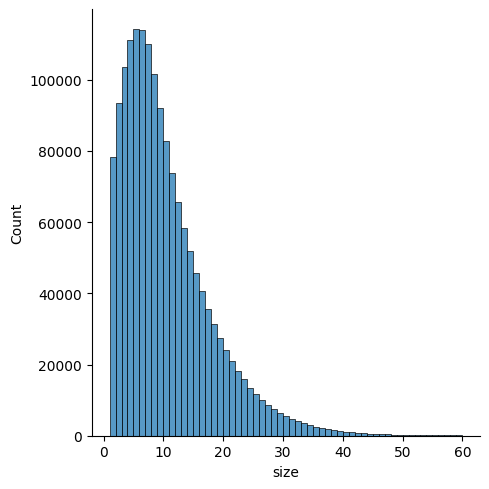

In [12]:
# 주문 크기별 통계 그래프

df_size = df[['order_id', 'size']]
df_size = df_size.drop_duplicates()
df_size['size'].value_counts()

ax = sns.displot(df_size, x='size', binwidth=1)

## 2-2. 주문 요일
---

### 2-2-1. 요일별 주문 통계
---

In [13]:
# 주문 요일 통계

df_day = df[['order_id', 'user_id']]

day_name = ['sun', 'mon', 'tue', 'wen', 'thr', 'fri', 'sat']
bins = [0, 1, 2, 3, 4, 5, 6, 7]

# 주문요일 카테고리화
df_day['day'] = pd.cut(df['order_dow'], bins=bins, labels=day_name, right=False)

# 중복행 삭제
df_day.drop_duplicates(inplace=True)
df_day.shape

C:\Users\bosod\AppData\Local\Temp\ipykernel_14916\3085828725.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['day'] = pd.cut(df['order_dow'], bins=bins, labels=day_name, right=False)
C:\Users\bosod\AppData\Local\Temp\ipykernel_14916\3085828725.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day.drop_duplicates(inplace=True)


(1607030, 3)

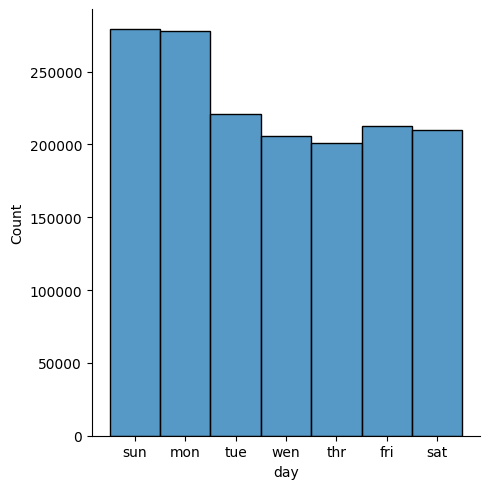

In [14]:
# 주문요일 통계 그래프

ax = sns.displot(df_day['day'])

### 2-2-2. 요일별 주문 크기 통계
---

In [15]:
df_day = pd.merge(df_day, df[['order_id', 'size']].drop_duplicates(), on=['order_id'])
df_day.head()

,order_id,user_id,day,size
0,3,205970,fri,8
1,258,184598,mon,15
2,342,183968,tue,11
3,346,161624,sat,6
4,582,193223,tue,22


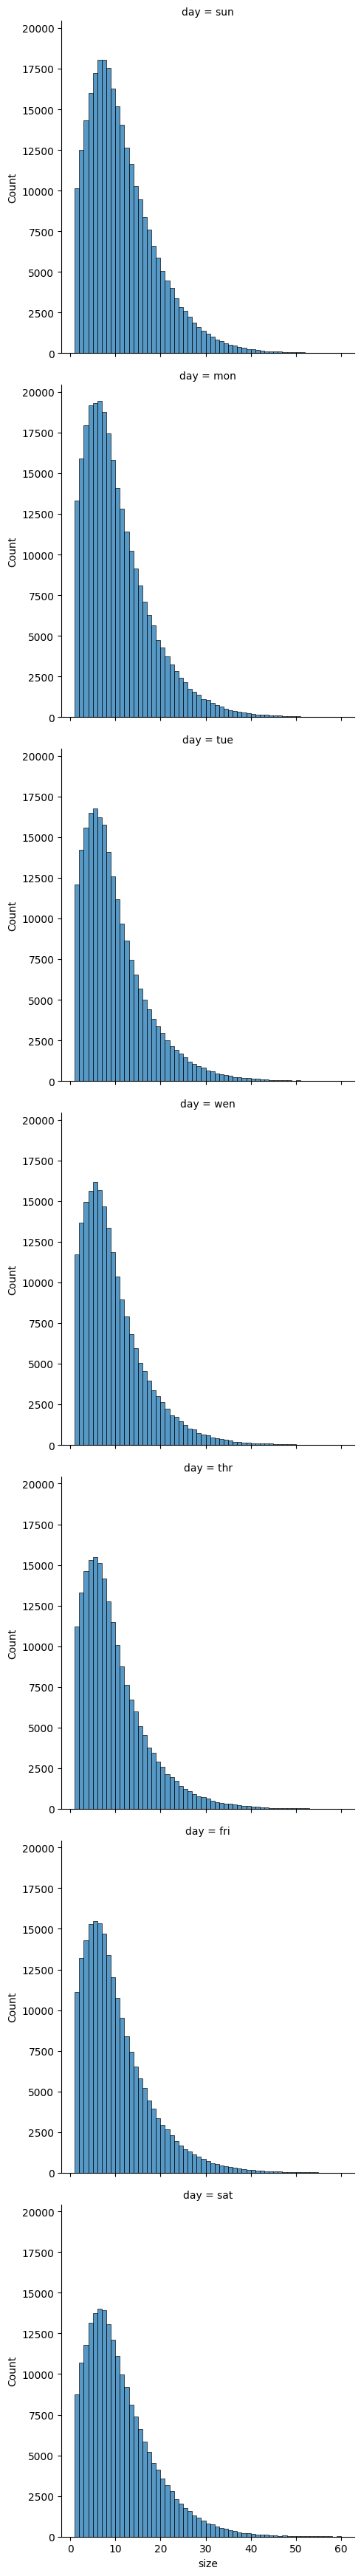

In [16]:
# 요일별 주문 크기 통계 그래프

ax = sns.displot(df_day, x='size', row='day', binwidth=1)

## 2-3. 주문 시간대
---

### 2-3-1. 주문 시간대 통계
---

In [17]:
# 요일 + 주문 시간대 데이터

temp = df[['order_id', 'order_hour_of_day']].drop_duplicates()
df_hour = pd.merge(df_day, temp, on=['order_id'])
df_hour

,order_id,user_id,day,size,order_hour_of_day
0,3,205970,fri,8,17
1,258,184598,mon,15,9
2,342,183968,tue,11,17
3,346,161624,sat,6,18
4,582,193223,tue,22,19
...,...,...,...,...,...
1607025,924651,599,tue,1,17
1607026,3290453,599,wen,1,18
1607027,1333472,62079,wen,1,10
1607028,3278498,115929,fri,1,22


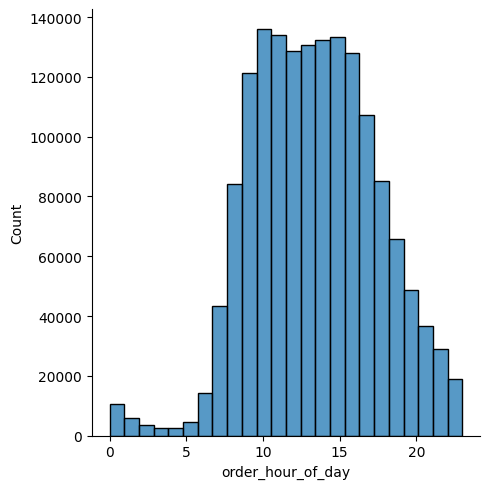

In [18]:
# 주문 시간대 그래프

ax = sns.displot(df_hour['order_hour_of_day'], bins=24)

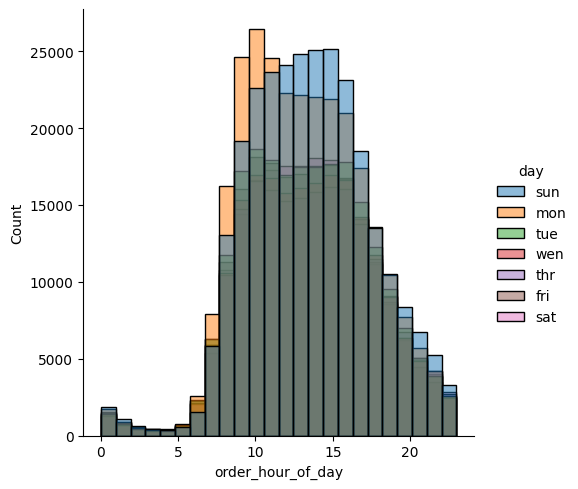

In [19]:
# 요일별 주문 시간대

ax = sns.displot(df_hour, x='order_hour_of_day', hue='day', bins=24) # row='day' 추가시 개별 출력

### 2-3-2. 주문 시간대별 상품 구성
---

In [20]:
# 상품번호 + 주문시간 데이터

temp = df[['product_id', 'order_hour_of_day']]
temp

,product_id,order_hour_of_day
0,33754,17
1,33754,9
2,33754,17
3,33754,18
4,33754,19
...,...,...
16188687,44956,20
16188688,29951,18
16188689,29951,9
16188690,7626,14


In [21]:
# 주문시간대 평균 + 표준편차

temp_mean = round(temp.groupby('product_id').mean(), 3)
temp_std = round(temp.groupby('product_id').std(), 3)

df_order_hour = pd.merge(temp_mean, temp_std, on=['product_id'])
df_order_hour.columns = ['mean', 'std']
df_order_hour

,mean,std
product_id,,
1,13.144,4.226
2,13.438,3.875
3,12.378,4.641
4,13.517,4.184
5,11.375,4.897
...,...,...
49684,12.000,2.828
49685,13.538,3.647
49686,13.262,4.449


In [22]:
# aisle 열 추가

temp = df_order_hour.reset_index()
temp['aisle'] = temp['product_id'].apply(prod_aisle)
df_order_aisle = temp.set_index('product_id')
df_order_aisle

,mean,std,aisle
product_id,,,
1,13.144,4.226,cookies cakes
2,13.438,3.875,spices seasonings
3,12.378,4.641,tea
4,13.517,4.184,frozen meals
5,11.375,4.897,marinades meat preparation
...,...,...,...
49684,12.000,2.828,spirits
49685,13.538,3.647,frozen vegan vegetarian
49686,13.262,4.449,bread


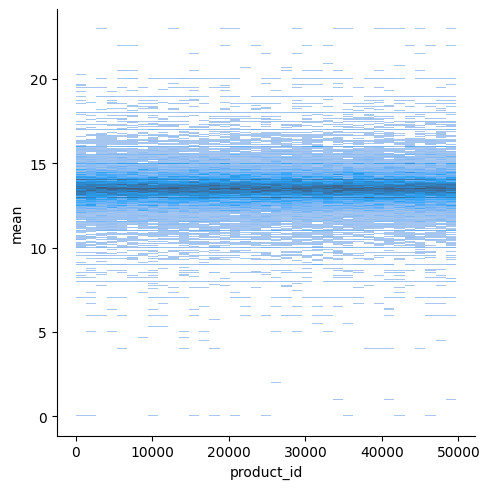

In [23]:
# 전체 제품의 평균 주문시간 그래프

ax = sns.displot(df_order_hour, x='product_id', y='mean')

### 2-3-3. aisle별 상품 주문시간
---

In [24]:
# aisle 별 상품들의 평균 주문시간 데이터 반환 함수

def prod_hour_mean(aisle):
    return df_order_aisle[df_order_aisle['aisle'] == f'{aisle}']

prod_hour_mean('fresh fruits')

,mean,std,aisle
product_id,,,
143,13.538,4.427,fresh fruits
148,13.171,4.298,fresh fruits
260,13.506,4.397,fresh fruits
557,13.822,4.469,fresh fruits
1181,13.642,4.359,fresh fruits
...,...,...,...
49347,13.970,4.940,fresh fruits
49380,14.156,4.566,fresh fruits
49407,14.333,5.132,fresh fruits


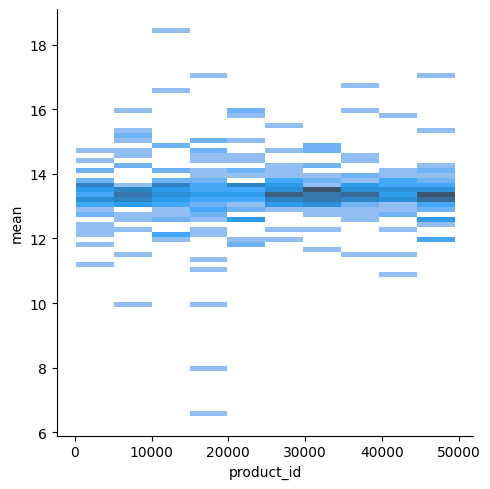

In [25]:
# 'fresh fruits' 제품군의 평균 주문 시간 그래프

ax = sns.displot(prod_hour_mean('fresh fruits'), x='product_id', y='mean')

## 2-4. 상품별 재주문 비율
---

In [26]:
# 총주문량 + 재주문 비율

temp_mean = df[['product_id', 'reordered']].groupby('product_id').mean() # 신규 주문 정도
temp_size = df[['product_id', 'reordered']].groupby('product_id').count() # 총 주문량

df_ordd = pd.concat([temp_size, temp_mean], axis=1)
df_ordd.columns = ['size', 'mean']
df_ordd

,size,mean
product_id,,
1,917,0.609597
2,48,0.145833
3,135,0.674074
4,172,0.465116
5,8,0.500000
...,...,...
49684,4,0.250000
49685,26,0.076923
49686,61,0.754098


In [27]:
# aisle 열 추가

df_ordd.reset_index(inplace=True)
df_ordd['aisle'] = df_ordd.reset_index()['product_id'].apply(prod_aisle)

df_ordd

,product_id,size,mean,aisle
0,1,917,0.609597,cookies cakes
1,2,48,0.145833,spices seasonings
2,3,135,0.674074,tea
3,4,172,0.465116,frozen meals
4,5,8,0.500000,marinades meat preparation
...,...,...,...,...
49298,49684,4,0.250000,spirits
49299,49685,26,0.076923,frozen vegan vegetarian
49300,49686,61,0.754098,bread
49301,49687,6,0.500000,cat food care


In [28]:
# 가장 많이 팔리는 상위 20개 상품

df_ordd.sort_values('size', ascending=False).head(20)

,product_id,size,mean,aisle
24660,24852,235809,0.844497,fresh fruits
13072,13176,189844,0.832225,fresh fruits
20972,21137,132232,0.778170,fresh fruits
21730,21903,121009,0.772273,packaged vegetables fruits
46843,47209,107073,0.795607,fresh fruits
47395,47766,88219,0.759236,fresh fruits
47259,47626,75900,0.696061,fresh fruits
16663,16797,71606,0.697483,fresh fruits
26004,26209,70156,0.680070,fresh fruits
27629,27845,68671,0.830336,milk


### 2-4-1. aisle 별 재주문율
---

In [29]:
# aisle별 평균 재주문율

df_ordd_mean = pd.DataFrame(df_ordd.groupby('aisle').mean()['mean'])
df_ordd_mean

,mean
aisle,
air fresheners candles,0.243860
asian foods,0.274685
baby accessories,0.192468
baby bath body care,0.201205
baby food formula,0.476240
...,...
trash bags liners,0.238262
vitamins supplements,0.207472
water seltzer sparkling water,0.590899


In [30]:
# act 상위 20개 aisle

df_ordd_mean.sort_values('mean', ascending=False).head(20)

,mean
aisle,
milk,0.622596
eggs,0.611912
water seltzer sparkling water,0.590899
energy sports drinks,0.577055
packaged produce,0.574746
yogurt,0.571737
soy lactosefree,0.570263
bread,0.549685
refrigerated,0.533092


# 3. 가설 설정
---
---

- 3-1. 폭염시 수박·닭고기 판매량 증가, 구매처 실내 선호·외식 증가한다.
    - http://www.daejonilbo.com/news/articleView.html?idxno=1380803
    - https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=kma_131&logNo=221276325477  
    - h1-1 : 더위에 잘 팔리는 제품과 다른 제품간의 상호 관계가 있다.

- 3-2. 폭염시 현장 방문 횟수를 줄인다.       
    - https://economist.co.kr/article/view/ecn202207200093
    - h2-1 : 크기가 작은 주문을 자주하는 고객이 많다.
    - h2-2 : 주문 크기가 클수록 방문 빈도가 낮다.

- 3-3. 폭염과 열대야가 시작된 이후 야간시간대 현장 방문객들이 급격히 늘었다.
    - https://www.kyongbuk.co.kr/news/articleView.html?idxno=1032740
    - h3-1 : 야간 시간대만 주문 비율이 높은 상품군이 있다.


---

## h1. 더위에 잘 팔리는 제품군(냉동 식품)과 다른 제품간의 상호관계
---

In [31]:
# 임시 데이터

temp = df[['order_id', 'department']].sort_values('order_id')
temp

,order_id,department
0,3,dairy eggs
724474,3,dairy eggs
2702215,3,produce
2703388,3,produce
749221,3,dairy eggs
...,...,...
16024910,3421083,babies
10132824,3421083,household
15869779,3421083,babies
5969979,3421083,produce


In [32]:
# 관심 항목이 포함된 department

# department에 포함된 aisle 출력 함수
def aisle_names(department):
    temp = df[['aisle', 'department']]
    return temp[temp['department'] == department]['aisle'].unique()


# frozen 하위 항목
print(aisle_names('frozen'))


print('------------------------------')


# meat seafood 하위 항목
# 가금류(닭고기)
print(aisle_names('meat seafood'))


print('------------------------------')


# produce 하위 항목
# 신선 야채, 과일
print(aisle_names('produce'))

['frozen meat seafood' 'frozen appetizers sides' 'frozen breakfast'
 'frozen breads doughs' 'frozen produce' 'frozen meals' 'ice cream ice'
 'frozen dessert' 'frozen pizza' 'frozen vegan vegetarian' 'frozen juice']
------------------------------
['poultry counter' 'packaged poultry' 'hot dogs bacon sausage'
 'seafood counter' 'packaged seafood' 'meat counter' 'packaged meat']
------------------------------
['packaged vegetables fruits' 'fresh vegetables' 'fresh fruits'
 'packaged produce' 'fresh herbs']


In [33]:
# department count 데이터

temp_cnt = temp.groupby(['order_id', 'department']).size().reset_index(name='cnt')
temp_cnt.set_index(['order_id', 'department'], inplace=True)
temp_cnt.head()

cnt
order_id department       
3        bakery          1
         dairy eggs      3
         meat seafood    1
         produce         3
5        beverages       1

In [34]:
# 해당 department 주문이 포함된 데이터 출력

def depart_in(depart_name):
    temp_ind = temp_cnt[temp_cnt.index.get_level_values('department').str.contains(f'{depart_name}')].index.get_level_values('order_id').unique()
    temp_in = temp_cnt.loc[temp_ind]
    return temp_in


# # 해당 department 주문이 포함되지 않은 데이터 출력

def depart_not_in(depart_name):
    temp_ind = temp_cnt[~temp_cnt.index.get_level_values('department').str.contains(f'{depart_name}')].index.get_level_values('order_id').unique()
    temp_in = temp_cnt.loc[temp_ind]
    return temp_in

In [35]:
# 관심 department가 포함된 주문과 다른 department와의 평균 연관성, 주문량 출력 함수

def relation(depart):
    df_depart = depart_in(f'{depart}')

    depart_cnt = df_depart.reset_index().query(f'department == "{depart}"')[['order_id', 'cnt']] # 각 order_id의 관심 depart 주문량

    df_depart.reset_index(inplace=True)
    df_depart = df_depart.merge(depart_cnt, on='order_id')
    df_depart.columns = ['order_id', 'department', 'cnt', 'depart_size']

    # 관련 점수 설정
    df_depart['ratio'] = round(df_depart['depart_size']/(abs(df_depart['cnt'] - df_depart['depart_size']) + df_depart['depart_size']), 2)

    temp = df_depart[['department', 'ratio']]

    temp_mean = temp.groupby('department').mean()
    temp_cnt = temp.groupby('department').count()

    result = pd.merge(temp_mean, temp_cnt, on='department')
    result.columns = ['mean', 'cnt']
    result.sort_values('mean', ascending=False, inplace=True)
    result.drop(f'{depart}', inplace=True)
    return result

,mean,cnt
department,,
bulk,0.830573,6907
other,0.802836,7690
meat seafood,0.784172,140327
international,0.780414,55472
missing,0.777292,15156
bakery,0.769953,212975
breakfast,0.767649,127662
deli,0.765618,187327
personal care,0.763144,71299


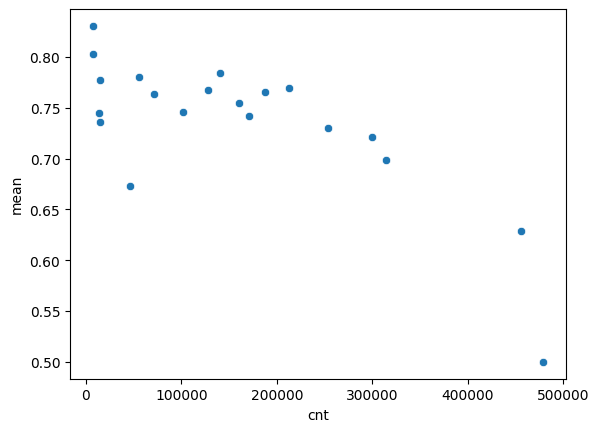

In [36]:
# frozen과 연관성

df_froz = relation('frozen')
display(df_froz)

ax = sns.scatterplot(df_froz, x='cnt', y='mean')

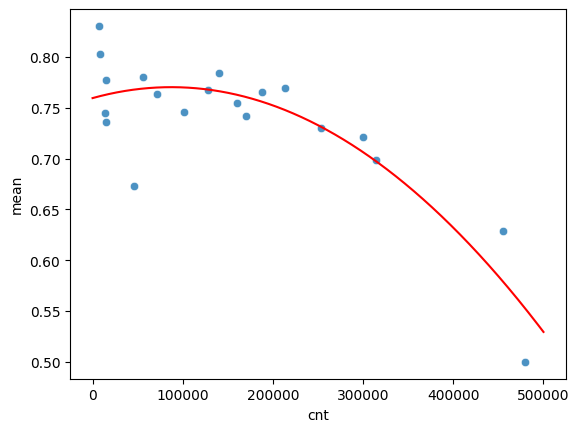

In [90]:
# 회귀선 

x = np.array(df_froz['cnt'])[:, np.newaxis]
y = np.array(df_froz['mean'])

linear = LinearRegression()

quad = PolynomialFeatures(degree=2)
x_quad = quad.fit_transform(x)

x_fit = np.arange(0, 500000, 1)[:, np.newaxis]

linear.fit(x_quad, y)
y_quad_fit = linear.predict(quad.fit_transform(x_fit))
y_quad_pred = linear.predict(x_quad)

sns.scatterplot(x=df_froz['cnt'], y=df_froz['mean'], alpha=0.8);
plt.plot(x_fit, y_quad_fit, color='red')

### __<center> -> 주문 연관성은 주문 횟수를 따른다.</center>__

,mean,cnt
department,,
bulk,0.921644,3200
other,0.910093,3548
missing,0.876705,6889
international,0.856338,31368
breakfast,0.830877,58276
personal care,0.830041,30466
deli,0.818489,94623
bakery,0.815486,111276
pets,0.794468,6434


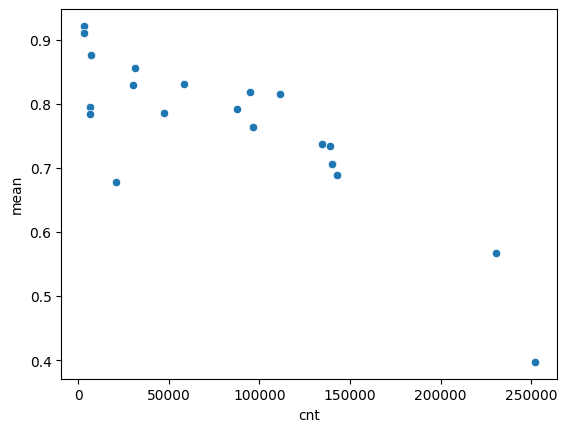

In [37]:
# meat seafood와 연관성


df_meat = relation('meat seafood')
display(df_meat)

ax = sns.scatterplot(df_meat, x='cnt', y='mean')

### __<center> -> 주문 연관성은 주문 횟수를 따른다.</center>__

,mean,cnt
department,,
alcohol,0.708175,21138
pets,0.680520,19159
personal care,0.674314,112952
dairy eggs,0.673693,884301
household,0.672079,163039
other,0.666663,12947
beverages,0.664950,535696
bakery,0.663722,367721
pantry,0.662841,460860


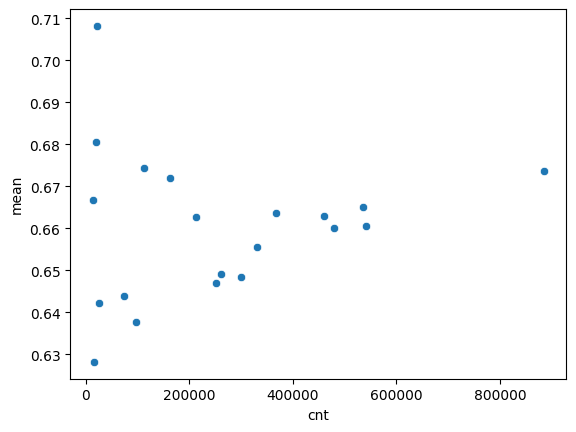

In [38]:
# produce와 연관성

df_prod = relation('produce')
display(df_prod)

ax = sns.scatterplot(df_prod, x='cnt', y='mean')

### __<center> -> produce 제품군과 상대적으로 dairy eggs이 연관이 높다.</center>__

## h2-1. 주문 크기와 주문 횟수 관계
---

In [39]:
# 임시 데이터

temp = df[['order_id', 'user_id', 'size']].drop_duplicates().sort_values('user_id')
temp.head()

,order_id,user_id,size
1744868,2254736,1,5
1743252,431534,1,8
832189,2539329,1,5
1744907,2295261,1,6
1745648,3108588,1,6


In [40]:
# 주문 횟수 데이터 추가

temp_cnt = temp.groupby('user_id').count()['size']

temp = pd.merge(temp, temp_cnt, on=['user_id'])
temp.columns = ['order_id', 'user_id', 'size', 'cnt']

temp

,order_id,user_id,size,cnt
0,2254736,1,5,5
1,431534,1,8,5
2,2539329,1,5,5
3,2295261,1,6,5
4,3108588,1,6,5
...,...,...,...,...
1607025,2266710,206209,9,7
1607026,3154581,206209,13,7
1607027,626363,206209,20,7
1607028,1542354,206209,15,7


In [41]:
# 주문 크기 평균, 표준편차

temp_mean = round(temp.groupby('user_id')['size'].mean(), 3)
temp_std = round(temp.groupby('user_id')['size'].std(), 3)

df_cnt = pd.merge(temp_mean, temp_std, on=['user_id'])
df_cnt.columns = ['mean', 'std']

df_cnt

,mean,std
user_id,,
1,6.000,1.225
2,15.300,5.945
3,7.857,1.952
4,4.000,2.646
5,8.000,4.243
...,...,...
206204,17.000,NaN
206206,5.103,4.370
206207,13.500,5.891


In [42]:
# cnt 열 추가

df_cnt = pd.merge(df_cnt, temp[['user_id', 'cnt']].drop_duplicates(), on=['user_id'], how='left')
df_cnt.head()

,user_id,mean,std,cnt
0,1,6.000,1.225,5
1,2,15.300,5.945,10
2,3,7.857,1.952,7
3,4,4.000,2.646,3
4,5,8.000,4.243,2


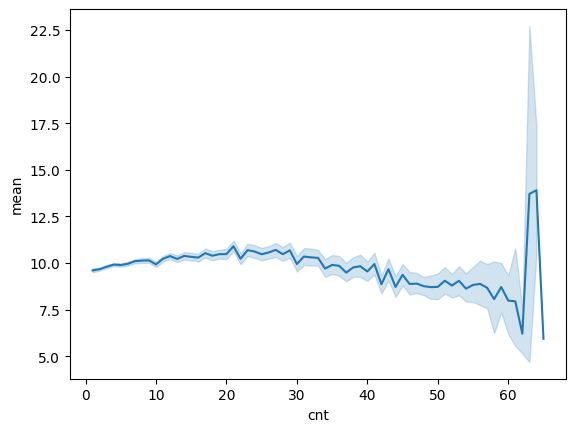

In [43]:
# 주문 크기, 주문 횟수 상관관계 그래프

ax = sns.lineplot(df_cnt, x='cnt', y='mean')

### __<center> -> 자주 방문할수록 평균 주문 크기가 작아진다.</center>__

## h2-2. 주문 크기와 방문 주기 관계
---

In [44]:
# 고객별 주문크기와 방문주기 데이터

temp = df[['order_id', 'days_since_prior_order', 'size']]
temp = temp.sort_values('order_id').drop_duplicates()
temp

,order_id,days_since_prior_order,size
0,3,12.0,8
2824397,5,9.0,26
10627766,12,10.0,15
11555568,14,3.0,11
12630335,16,13.0,3
...,...,...,...
15747176,3421075,13.0,8
9747551,3421078,7.0,9
13602186,3421079,0.0,1
2082968,3421082,4.0,7


In [45]:
# 주문크기별 주문격차 평균, 표준편차

temp_mean = temp.groupby('size')['days_since_prior_order'].mean()
temp_std = temp.groupby('size')['days_since_prior_order'].std()

df_prior = pd.concat([temp_mean, temp_std], axis=1)
df_prior.columns = ['mean', 'std']
df_prior.head()

,mean,std
size,,
1,11.154732,10.066512
2,10.710164,9.662366
3,10.306497,9.322902
4,10.023551,9.089768
5,9.916159,8.929892


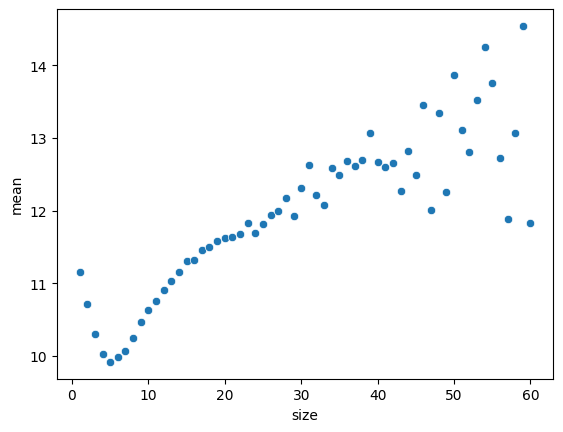

In [61]:
# 주문 크기와 이전 방문기간 평균 그래프

ax = sns.scatterplot(df_prior, x=df_prior.index, y='mean')

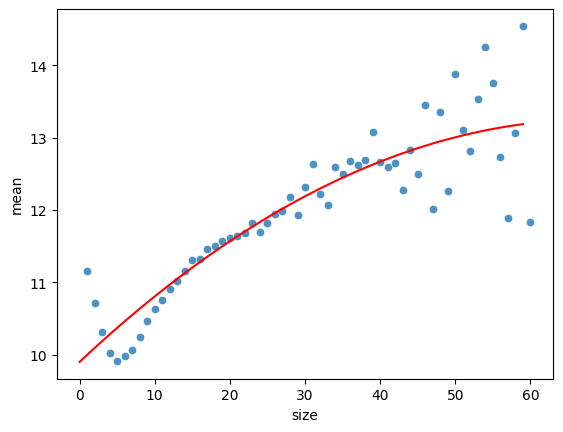

In [92]:
# 회귀선 

temp = df_prior.reset_index()

x = np.array(temp['size'])[:, np.newaxis]
y = np.array(temp['mean'])

linear = LinearRegression()

quad = PolynomialFeatures(degree=2)
x_quad = quad.fit_transform(x)

x_fit = np.arange(0, 60, 1)[:, np.newaxis]

linear.fit(x_quad, y)
y_quad_fit = linear.predict(quad.fit_transform(x_fit))
y_quad_pred = linear.predict(x_quad)

sns.scatterplot(x=temp['size'], y=temp['mean'], alpha=0.8);
plt.plot(x_fit, y_quad_fit, color='red')

### __<center> -> 주문 크기가 클수록 방문 주기가 길어진다.</center>__
__<center> (위와 같은 맥락)</center>__

## h3. 야간 시간대의 주문 비율이 높은 상품군이 있다.
---

### 3-1. 오전, 오후, 심야 주문 구분

In [47]:
temp = df[['aisle_id', 'order_hour_of_day']].sort_values('aisle_id')
temp.head()

,aisle_id,order_hour_of_day
9336239,1,13
9328358,1,9
9328359,1,15
9328360,1,0
9328361,1,12


In [48]:
# 시간대 지정
# 오전(6~12), 오후(12~22), 야간(22~6)

time = ['night', 'morn', 'noon', 'night']
bins = [0, 6, 12, 22, 24]

temp['time'] = pd.cut(temp['order_hour_of_day'], bins=bins, labels=time, right=False, ordered=False)

temp

,aisle_id,order_hour_of_day,time
9336239,1,13,noon
9328358,1,9,morn
9328359,1,15,noon
9328360,1,0,night
9328361,1,12,noon
...,...,...,...
16184994,134,18,noon
16184993,134,16,noon
16184992,134,15,noon
16185000,134,8,morn


In [49]:
# 시간대별 주문 횟수

temp_cnt = temp.groupby(['aisle_id', 'time']).count()
temp_cnt.columns = ['cnt']
temp_cnt

cnt
aisle_id time        
1        morn   11843
         night   1681
         noon   22369
2        morn   13266
         night   2140
...               ...
133      night    444
         noon    5770
134      morn    1609
         night    168
         noon    3764

[402 rows x 1 columns]

In [50]:
# 각 시간대별 비율 계산

temp_sum = temp_cnt.groupby('aisle_id')['cnt'].transform('sum')

temp_cnt['ratio'] = round(temp_cnt['cnt']/temp_sum, 3)
temp_cnt['sum'] = temp_sum

temp_cnt

cnt  ratio    sum
aisle_id time                      
1        morn   11843  0.330  35893
         night   1681  0.047  35893
         noon   22369  0.623  35893
2        morn   13266  0.320  41489
         night   2140  0.052  41489
...               ...    ...    ...
133      night    444  0.048   9293
         noon    5770  0.621   9293
134      morn    1609  0.290   5541
         night    168  0.030   5541
         noon    3764  0.679   5541

[402 rows x 3 columns]

In [51]:
# night 시간대 주문 비율 상위 10위 출력

temp_night = temp_cnt.xs('night', level='time') # time이 night인 데이터

temp_night10 = temp_night.sort_values('ratio', ascending=False).head(10)


def aisle_name(ind):
    return aisle.query(f'aisle_id=={ind}').iloc[0,1]

temp_ind = pd.DataFrame(temp_night10.index)
temp_ind['aisle'] = temp_ind['aisle_id'].apply(aisle_name) # aisle 이름 추가

temp_night10 = pd.merge(temp_night10, temp_ind, on=['aisle_id']) # 결합

temp_night10 

,aisle_id,cnt,ratio,sum,aisle
0,33,421,0.072,5823,kosher foods
1,102,298,0.070,4256,baby bath body care
2,132,212,0.069,3082,beauty
3,109,319,0.063,5056,skin care
4,32,8373,0.061,137801,packaged produce
5,15,645,0.061,10560,packaged seafood
6,10,278,0.060,4604,kitchen supplies
7,14,3859,0.060,64413,tofu meat alternatives
8,97,699,0.059,11778,baking supplies decor
9,76,471,0.059,8022,indian foods


### __<center> -> '포장 식품' 및 '여성 제품'의 야간 주문 비율 높음</center>__  
### __<center> -> 해당 제품군은 현장 판매 지향 </center>__  

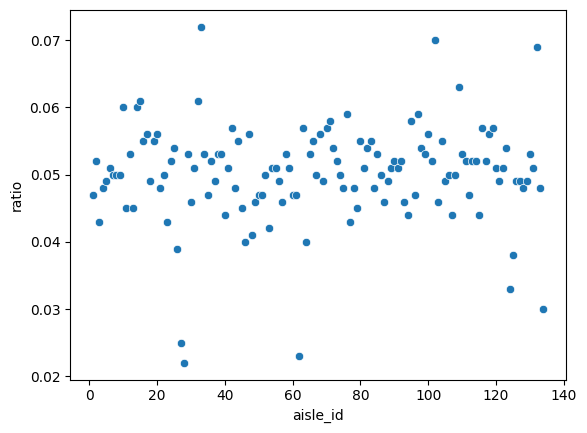

In [52]:
# aisle_id 별 야간 주문 비율(ratio) 출력

ax = sns.scatterplot(temp_night, x='aisle_id', y='ratio')